In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import cv2

In [2]:
# --------------------------------
  # Loading Dataset
# --------------------------------

(X_train,y_train),(X_test,y_test) = mnist.load_data()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,354 (255.29 KB)

 Trainable params: 65,354 (255.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 40ms/step - accuracy: 0.7675 - loss: 0.7061 - val_accuracy: 0.9563 - val_loss: 0.1310
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - accuracy: 0.9431 - loss: 0.1799 - val_accuracy: 0.9783 - val_loss: 0.0683
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - accuracy: 0.9594 - loss: 0.1283 - val_accuracy: 0.9812 - val_loss: 0.0589
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - accuracy: 0.9664 - loss: 0.1070 - val_accuracy: 0.9807 - val_loss: 0.0592
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.9692 - loss: 0.0965 - val_accuracy: 0.9858 - val_loss: 0.0494
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 40ms/step - accuracy: 0.9731 - loss: 0.0817 - val_accuracy: 0.9852 - val_loss: 0.0448
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 39ms/step - accuracy: 0.9757 - loss: 0.0791 - val_accuracy: 0.9860 - val_loss: 0.0490
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.9763 - loss: 0.07

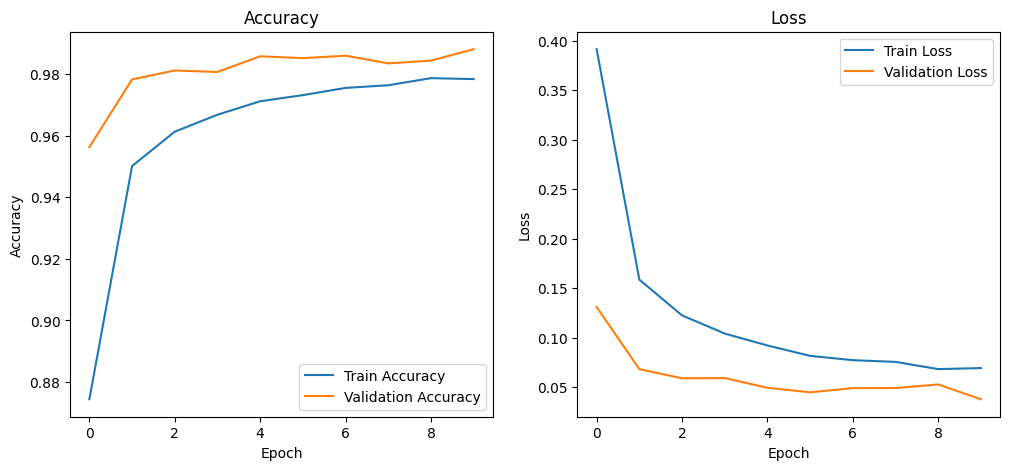

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Predicted Digit: 1


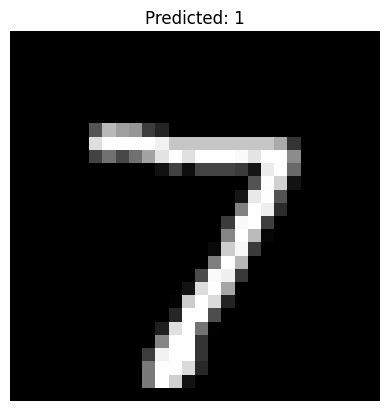

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
import cv2

# -----------------------------
# Config
# -----------------------------
IMG_SIZE = (28,28)
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = 10

# -----------------------------
# 1. Load Data
# -----------------------------
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape(-1,28,28,1) / 255.0
X_test = X_test.reshape(-1,28,28,1) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

# -----------------------------
# 2. Image Data Generators
# -----------------------------
train_datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

test_datagen = ImageDataGenerator()

train_data = train_datagen.flow(
    X_train, y_train, batch_size=BATCH_SIZE, shuffle=True
)

test_data = test_datagen.flow(
    X_test, y_test, batch_size=BATCH_SIZE
)

# -----------------------------
# 3. Build CNN Model
# -----------------------------
model = Sequential([
    Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(NUM_CLASSES,activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# -----------------------------
# 4. Train the model
# -----------------------------
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=EPOCHS
)

# -----------------------------
# 5. Plot Accuracy and Loss
# -----------------------------
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# -----------------------------
# 6. Predict a single image
# -----------------------------
class_names = [str(i) for i in range(10)]

def preprocess_image(img_array):
    img = img_array / 255.0
    return np.expand_dims(img, axis=(0,-1))

test_img = X_test[0]
img_input = preprocess_image(test_img)

pred_probs = model.predict(img_input)
pred_class = class_names[np.argmax(pred_probs)]

print("Predicted Digit:", pred_class)
plt.imshow(test_img.squeeze(), cmap='gray')
plt.title("Predicted: " + pred_class)
plt.axis('off')
plt.show()


## **Exercise:**

1. Increase More Epochs so that Model can learn more patterns

2. Add Convolutional layers

3. Try adding dropout layers

